# SMS SPAM FILTER


There are 5,572 Sms writtten in English. 4825 is ham sms and 747 is spam


****Text preprocessing****

Change column names (v1 to label and v2 to text) and create a new column. The name of the new column is 'copy' and it is the exact copy of the text column. The main purpose of creating an exact copy of the text column is to see the difference between processed and unprocessed data. We need to encode the class labels in the text column because of the binary classes. (spam = 1 , ham = 0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


df = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv", encoding='latin-1', usecols = [0, 1])

df.rename(columns = {'v1':'label','v2':'text'},inplace=True)

df['class'] = df.label.map({'ham':0, 'spam':1})

df['copy'] = df.text



Let's see what we got

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label    5572 non-null object
text     5572 non-null object
class    5572 non-null int64
copy     5572 non-null object
dtypes: int64(1), object(3)
memory usage: 174.2+ KB


In [3]:
df.head(10)

,label,text,class,copy
0,ham,"Go until jurong point, crazy.. Available only ...",0,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...,0,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...,1,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...,1,Had your mobile 11 months or more? U R entitle...



We need to replace the some words and/or numbers with spesific strings in order to extract meaningful features from dataset. 

These are the few steps of what we are doing.

1. Replaced email adresses with 'emailaddr'
2. Replaced website names with httpaddr etc

Some words in the English language, while necessary, don't contribute much to the meaning of a phrase. These words, such as "when", "had", "those" or "before", are called **stop_words** and should be filtered out.

You can check what are the all words in the list of stop_words from [here](https://gist.github.com/sebleier/554280)

**Why we are do these things?**

Let's think of programming languages as babies. At the very beginning, babies know nothing about what you are trying to do. Later you give them some information and rules to understand their environment and their own purposes. In this way, babies can grow through our teaching and reflects it. Programming languages are exactly like the babies, they demand some information (inputs) from you, for the processing operation. Thus, you should describe every nuance in a proper way otherwise it's gonna be insufficient.
For instance

*  *"I feel exhausted."* 
*  *"i FEEL eXhAusted!"* 

Refers to same meaning. But in programming languages like python, its not the same thing at all. From python perspective, these are two different sentences.That's why we use lower() function and remove all punctuation since ***exhausted.*** and ***exhausted!*** refers to same word.




It's likely the corpus contains words with various suffixes such as "distribute", "distributing", "distributor" or "distribution". We can replace these four words with just "distribut" via a step called stemming.





In [4]:
import nltk
from nltk.corpus import stopwords

porter = nltk.PorterStemmer() #"distribute", "distributing", "distributor" or "distribution".
stop_words = nltk.corpus.stopwords.words('english')

def clean_text(string):
    message = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', string)
    message = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', #Replace URLs with 'httpaddr'
                     message)
    message = re.sub(r'£|\$', 'money', message) #Replace money symbols with 'moneysymb'
    message = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'phonenumbr'
        'phonenumbr', message)
    message = re.sub(r'\d+(\.\d+)?', 'numbr', message)  #Replace numbers with 'numbr'
    message = re.sub(r'[^\w\d\s]', ' ', message)
    message = re.sub(r'\s+', ' ', message)
    message = re.sub(r'^\s+|\s+?$', '', message.lower())
    return ' '.join(
    porter.stem(term) 
    for term in message.split()
    if term not in set(stop_words)
    )

Let's test it!

In [5]:
clean_text("going to vacation!!! 5734 I have ,.$ £")



'go vacat numbr money money'

Cool! Clean_text() function changed some words to spesific strings

* going -> go (PorterStemmer)
* to -> removed (because it is in the stop_words list)
* vacation -> vacat ( PorterStemmer)
* !!! -> removed
* 5734 -> numbr



In [6]:
textCopy = df['text'].copy()
textCopy = textCopy.apply(clean_text)
df["copy"] = textCopy
df.head(5)

,label,text,class,copy
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri numbr wkli comp win fa cup final tk...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = CountVectorizer() 

vectorizer.fit(textCopy)

tf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

ngrams = vectorizer.fit_transform(textCopy).toarray()

**Graphs**

In this part, we want to check what is the most 10 common words with how many times words are used in spam and ham texts.






In [8]:
from collections import Counter

spam_df = df[df['class'] == 1] #create sub-dataframe of spam text
ham_df = df[df['class'] == 0] #sub-dataframe of ham text
spam_df['copy'] = spam_df['copy'].map(clean_text)
ham_df['copy'] = ham_df['copy'].map(clean_text)
spam_df['new_column'] = spam_df['copy'].apply(lambda x: Counter(x.split(' ')))
forspam=Counter(" ".join(spam_df['copy']).split()).most_common(10)
forham=Counter(" ".join(ham_df['copy']).split()).most_common(10)

spamfeat=[]
for i in range(len(forspam)):
    spamcounter=forspam[i][0]
    spamfeat.append(spamcounter)

spamnumber=[]
for i in range(len(forspam)):
    spamcounter=forspam[i][1]
    spamnumber.append(spamcounter)

hamnumber=[]
for i in range(len(forham)):
    spamcounter=forham[i][1]
    hamnumber.append(spamcounter)
    
hamfeat=[]
for i in range(len(forham)):
    spamcounter=forham[i][0]
    hamfeat.append(spamcounter)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

Text(0.5, 1.0, 'ham top 10 words')

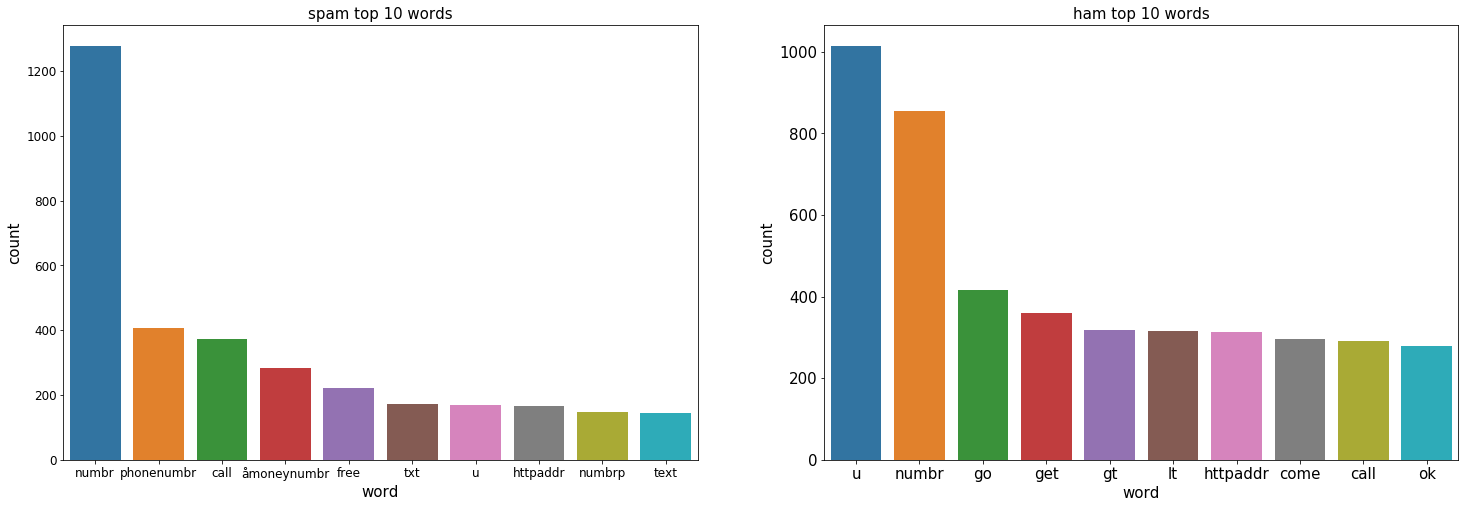

In [9]:
import seaborn as sns

fig, (ax,ax1) = plt.subplots(1,2,figsize = (25, 8))
sns.barplot(x = spamfeat, y=spamnumber, ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=12)
ax.set_title('spam top 10 words', fontsize = 15)

sns.barplot(x = hamfeat, y = hamnumber, ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('ham top 10 words', fontsize = 15)

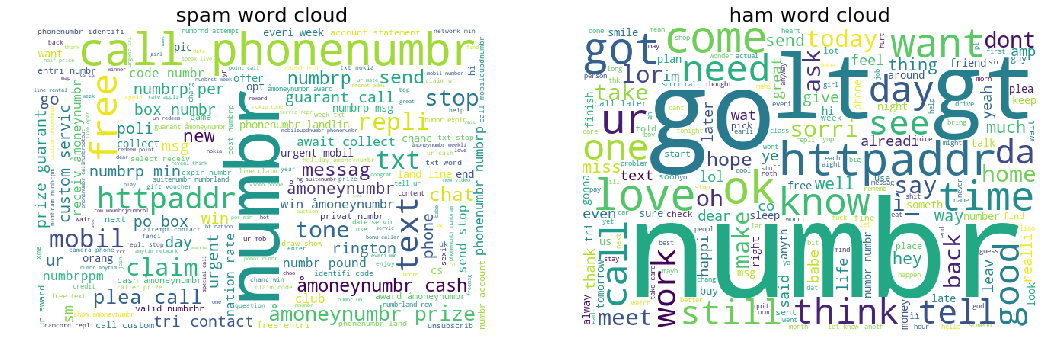

In [10]:
from wordcloud import WordCloud

forS=" ".join(spam_df['copy'])
forH=" ".join(ham_df['copy'])
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(forS)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(forH)

fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))
ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 20)
ax2.imshow(ham_word_cloud)
ax2.axis('off')
ax2.set_title('ham word cloud', fontsize = 20)
plt.show()

**Predictions**

In [11]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

n_folds = 5
def f1_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 29).get_n_splits(ngrams)
    f1 = cross_val_score(model, ngrams, df["class"], scoring = 'f1', cv = kf )
    return (f1)


In [12]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(ngrams, df['class'].values, test_size=.40)

clfs = {
    'Decision_tree': DecisionTreeClassifier(),
    'gradient_descent': SGDClassifier(),
    'Naive_bayes': GaussianNB(),
    'Logistic_Regression': LogisticRegression()
}

for clf_name in clfs.keys():
    print("Training",clf_name,"classifier")
    clf = clfs[clf_name]
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(classification_report(y_test, y_predict))
    print()



Training Decision_tree classifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1917
           1       0.94      0.89      0.91       312

    accuracy                           0.98      2229
   macro avg       0.96      0.94      0.95      2229
weighted avg       0.98      0.98      0.98      2229


Training gradient_descent classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1917
           1       0.97      0.91      0.94       312

    accuracy                           0.98      2229
   macro avg       0.98      0.95      0.96      2229
weighted avg       0.98      0.98      0.98      2229


Training Naive_bayes classifier
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1917
           1       0.55      0.92      0.69       312

    accuracy                           0.88      2229
   macro avg       0.77

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1917
           1       0.98      0.90      0.94       312

    accuracy                           0.98      2229
   macro avg       0.98      0.95      0.97      2229
weighted avg       0.98      0.98      0.98      2229


